In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [193]:
df.head()

Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [195]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [196]:
df.columns=["Month","Sales"]

In [197]:
df.head()

Month   Sales
0  1964-01  2815.0
1  1964-02  2672.0
2  1964-03  2755.0
3  1964-04  2721.0
4  1964-05  2946.0

In [198]:
df.drop(106,axis=0,inplace=True)

In [199]:
df.tail()

Month   Sales
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0
105      NaN     NaN

In [200]:
df.drop(105,axis=0,inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [202]:
df['Month']=pd.to_datetime(df['Month'])

In [203]:
df.head()

Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0

In [204]:
df.set_index('Month',inplace=True)

In [205]:
df.head()

Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0

In [206]:
df.describe()

Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000

<AxesSubplot:xlabel='Month'>

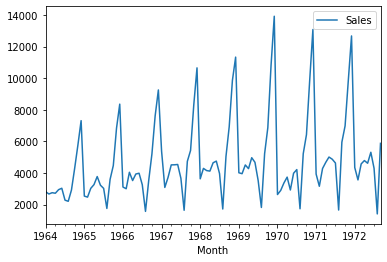

In [207]:
df.plot()

In [208]:
#testing for stationarity...dicky fuller test
from statsmodels.tsa.stattools import adfuller

In [209]:
test_result=adfuller(df['Sales'])

In [210]:
#H0= it is non stationary
#H1= it is stationary

def adfuller_test(Sales):
    result=adfuller(Sales)
    labels=['ADF statistic', 'p_value', '#lags_used','Number of observations used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print("strong evidence against the null hypo, reject null hypothesis,data has no root and is stationary")
    else: 
        print(" eak evidence against null hypo, time series has a unit root, indicating it is non stationary")

In [211]:
adfuller_test(df['Sales'])

ADF statistic:-1.8335930563276237
p_value:0.3639157716602447
#lags_used:11
Number of observations used:93
 eak evidence against null hypo, time series has a unit root, indicating it is non stationary


## differencing

In [212]:
df['Sales First Difference']= df['Sales'] - df['Sales'].shift(1)

In [213]:
df.head()

Sales  Sales First Difference
Month                                     
1964-01-01  2815.0                     NaN
1964-02-01  2672.0                  -143.0
1964-03-01  2755.0                    83.0
1964-04-01  2721.0                   -34.0
1964-05-01  2946.0                   225.0

In [214]:
df['Seasonal First Difference']= df['Sales'] - df['Sales'].shift(12)

In [215]:
df.head()

Sales  Sales First Difference  Seasonal First Difference
Month                                                                
1964-01-01  2815.0                     NaN                        NaN
1964-02-01  2672.0                  -143.0                        NaN
1964-03-01  2755.0                    83.0                        NaN
1964-04-01  2721.0                   -34.0                        NaN
1964-05-01  2946.0                   225.0                        NaN

In [216]:
## again test dicky fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF statistic:-7.626619157213163
p_value:2.060579696813685e-11
#lags_used:0
Number of observations used:92
strong evidence against the null hypo, reject null hypothesis,data has no root and is stationary


<AxesSubplot:xlabel='Month'>

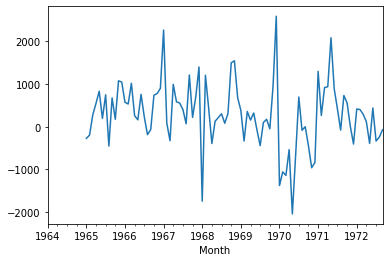

In [217]:
df['Seasonal First Difference'].plot()

In [218]:
## data is now stationary

## AUTO REGRESSIVE MODEL

In [219]:
#acf= autocorrelation and pacf= partial auto correlation 

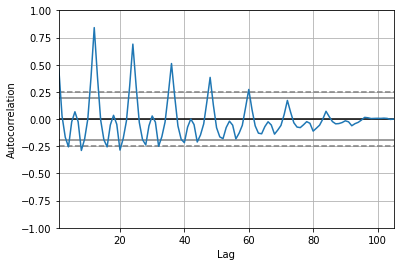

In [221]:
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
#from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [222]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

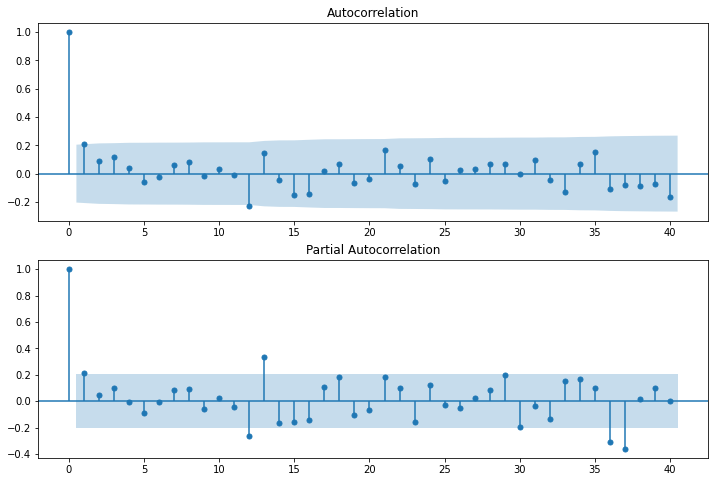

In [223]:
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [224]:
## for non seasonal data 

In [225]:
from statsmodels.tsa.arima_model import ARIMA

In [226]:
model= ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

In [227]:
import statsmodels.api as sm

In [229]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

results=model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

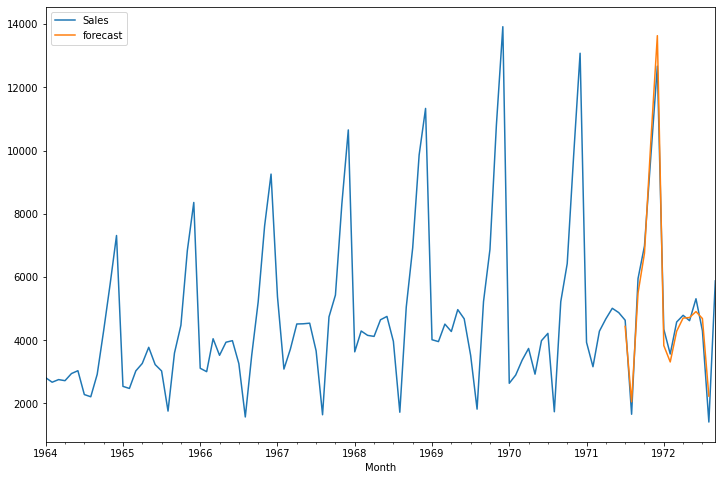

In [230]:
df['forecast']=results.predict(start=90, end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [234]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range (0,24)]

In [235]:
future_dataset_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)


In [237]:
future_dataset_df.tail()

Sales Sales First Difference Seasonal First Difference forecast
1974-04-01   NaN                    NaN                       NaN      NaN
1974-05-01   NaN                    NaN                       NaN      NaN
1974-06-01   NaN                    NaN                       NaN      NaN
1974-07-01   NaN                    NaN                       NaN      NaN
1974-08-01   NaN                    NaN                       NaN      NaN

In [238]:
future_df=pd.concat([df,future_dataset_df])

<AxesSubplot:>

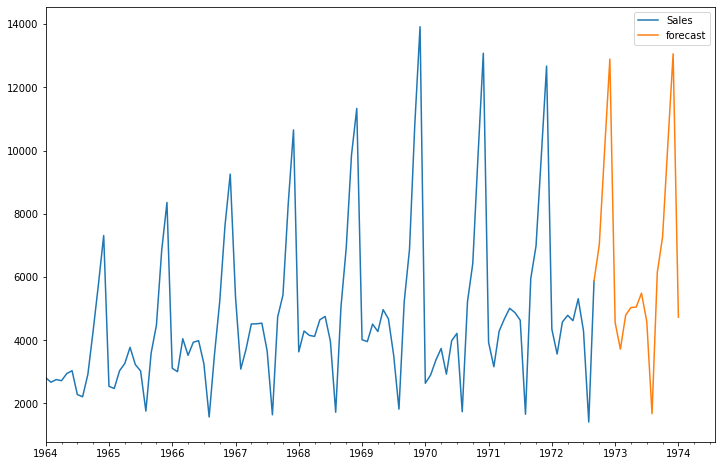

In [239]:
future_df['forecast']= results.predict(start=104, end=120, dynamic= True)
future_df[['Sales','forecast']].plot(figsize=(12,8))